# Predictive Modeling of Heart Disease Risk: Assessing the Role of Cholesterol and Blood Pressure Levels #

## Introduction ##
#### Background information: ####

Elevated levels of serum cholesterol and high blood pressure (hypertension) are well-established risk factors for the development of atherosclerosis, a condition characterized by the build-up of plaque in the arteries, these plaques can narrow the arteries, leading to a higher likelihood of developing heart disease. Furthermore, when high cholesterol levels and hypertension coexist, they can exacerbate each other's effects on blood vessel health, which causes an even greater risk of developing heart disease.
#### Our Question: ####
Can we use resting blood pressure and serum cholesterol levels to predict whether a patient will develop a heart disease?
#### The Dataset: ####
We will be using the Heart Disease dataset from the UC Irvine Machine Learning Repository. The dataset includes various attributes related to heart disease diganosis. Each row in the dataset represents a patient and it contains the following variables as columns (in order): age, sex, chest pain type (4 types), resting blood pressure (mm Hg), serum cholesterol (mg/dl), fasting blood sugar, resting ECG results (3 types), max heart rate achieved, exercise induced angina (1 = present, 0 = absent), ST depression, slope of peak exercise ST segment (3 types), number of major vessels coloured by fluoroscopy (0-3), thalassemia, and presence of heart disease (0 = no, 1-4 = yes).

## Preliminary exploratory data analysis ##

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


trestbps,chol,num
<dbl>,<dbl>,<fct>
145,233,Absent
160,286,Present
120,229,Present


num,count,percentage
<fct>,<int>,<dbl>
Absent,164,54.12541
Present,139,45.87459


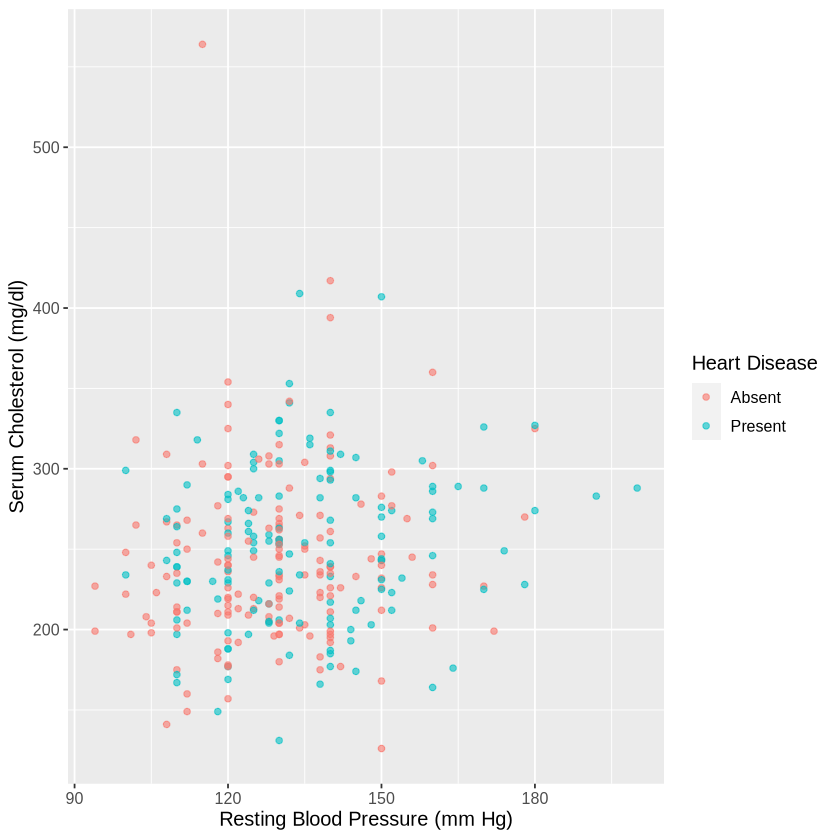

In [9]:
# trestbps: resting blood pressure (mm Hg), chol: total amount of cholesterol in the body (mg/dl)
# num: presence of heart disease in a patient (presence = 1,2,3,4), (absence = 0)

library(tidyverse)
# clean and wrangle data into a tidy data format
heart_data <- read_csv("data/processed.cleveland.data", col_names = FALSE) |>
        rename(trestbps = X4, chol = X5, num = X14) |>
        select(trestbps, chol, num) |>
        mutate(num = as_factor(num)) |>
        mutate(num = fct_recode(num, "Present" = "1", "Present" = "2", "Present" = "3", "Present" = "4", "Absent" = "0"))
slice_head(heart_data, n = 3)

# summarize the data in a table
num_obs <- nrow(heart_data)
heart_data |>
    group_by(num) |>
    summarize(count = n(), percentage = n()/ num_obs * 100)

# visualize the data with a plot relevant to the analysis
heart_plot <- heart_data |>
  ggplot(aes(x = trestbps, y = chol, color = num)) +
  geom_point(alpha = 0.6) +
  labs(x = "Resting Blood Pressure (mm Hg)",
       y = "Serum Cholesterol (mg/dl)",
       color = "Heart Disease") +
  theme(text = element_text(size = 12))
heart_plot

## Methods ##
- Explain how you will conduct either your data analysis and which variables/columns you will use.
- Describe at least one way that you will visualize the results

## Expected outcome and significance ##
From the scatterplot, we expect to find the relationship between the two variables "Resting Blood Pressure" and "Serum Cholesterol" for people with and without heart disease. The graph shows that the higher the average resting blood pressure and serum cholesterol, the more likely one is to have heart disease. Such findings can inform people about the importance of managing these risk factors to reduce the development of heart disease. The results of this analysis may lead to further research into the mechanisms that link blood pressure and cholesterol levels to heart disease and to the identification of new preventive strategies. Examples might include exploring the role of genetic factors, lifestyle, and age in modifying the relationship between blood pressure, cholesterol, and heart disease risk.